# 0212 analysis_of_sendrecv_results
## Overview
* 統合化予定の袖通信ルーチンのデバック・計算結果可視化

In [2]:
import numpy as np
from numpy import sin, cos, exp, pi, e, sqrt
import matplotlib.pyplot as plt
# from scipy import interpolate
# from scipy import signal

from scipy.constants import physical_constants, alpha, c, epsilon_0, Boltzmann
au_fs = physical_constants["atomic unit of time"][0] * 1e+15
au_ev = physical_constants["atomic unit of energy"][0] / physical_constants["electron volt"][0]
au_aa = physical_constants["atomic unit of length"][0] * 1e+10
au_va = physical_constants["atomic unit of electric field"][0] * 1.e-10
#au_as = physical_constants["atomic unit of time"][0] * 1e+18
#au_vm = physical_constants["atomic unit of electric field"][0]
#au_nm = physical_constants["atomic unit of length"][0] * 1e+9
au_um = physical_constants["atomic unit of length"][0] * 1e+6
cspeed_au = 1 / alpha
kb_au = Boltzmann / physical_constants["atomic unit of energy"][0]

%matplotlib inline

#import matplotlib.animation as animation
#%matplotlib nbagg

In [34]:
dat = np.load("./test002_result.npz")

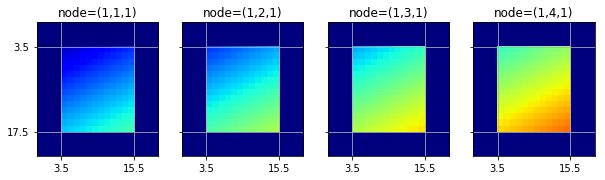

In [114]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=[10, 5])

j, k = 0, 0

for i in range(4):
    axes[i].imshow(dat["result"][0,i,j,k,:,:,4,0].T, cmap="jet", clim=[0, 100])
    axes[i].set_title("node=(%d,%d,%d)" % (k+1, i+1, j+1))
    axes[i].set_xticks([4-1+0.5, 12+4-0.5])
    axes[i].set_yticks([4-1+0.5, 14+4-0.5])
    axes[i].grid()

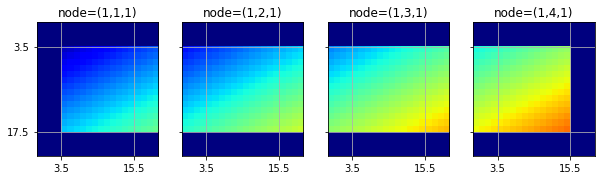

In [115]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=[10, 5])

j, k = 0, 0

for i in range(4):
    axes[i].imshow(dat["result"][1,i,j,k,:,:,4,0].T, cmap="jet", clim=[0, 100])
    axes[i].set_title("node=(%d,%d,%d)" % (k+1, i+1, j+1))
    axes[i].set_xticks([4-1+0.5, 12+4-0.5])
    axes[i].set_yticks([4-1+0.5, 14+4-0.5])
    axes[i].grid()

In [36]:
dat = np.load("./test003_result.npz")

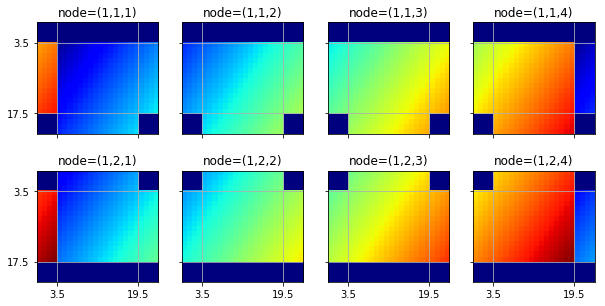

In [37]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=[10, 5])

k = 0

for i, j in np.ndindex(2, 4):
    axes[i][j].imshow(dat["result"][k,i,j,4,:,:,0], cmap="jet", clim=[0, 250])
    axes[i][j].set_title("node=(%d,%d,%d)" % (k+1, i+1, j+1))
    axes[i][j].set_xticks([4-1+0.5, 16+4-0.5])
    axes[i][j].set_yticks([4-1+0.5, 14+4-0.5])
    axes[i][j].grid()

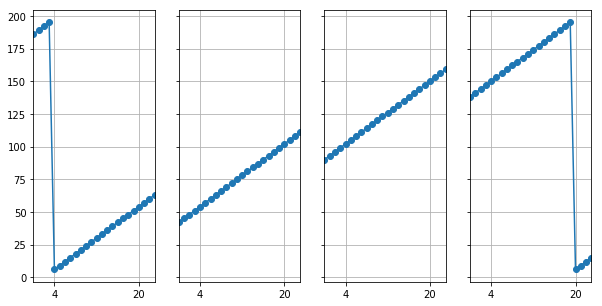

In [38]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=[10, 5])
for i in range(4):
    axes[i].plot(dat["result"][0,0,i,4,4,:,0], "-o")
    axes[i].set_xlim([0, 16+4+4-1])
    axes[i].set_xticks([4, 16+4])
    axes[i].grid()

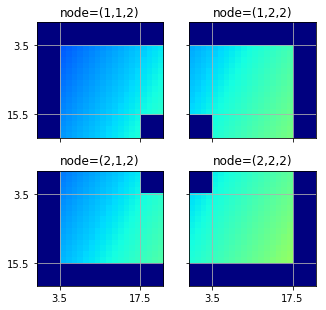

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[5, 5])

k = 1

for i, j in np.ndindex(2, 2):
    axes[i][j].imshow(dat["result"][i,j,k,:,:,4,0], cmap="jet", clim=[0, 250])
    axes[i][j].set_title("node=(%d,%d,%d)" % (i+1, j+1, k+1))
    axes[i][j].set_xticks([4-0.5, 14+4-0.5])
    axes[i][j].set_yticks([4-0.5, 12+4-0.5])
    axes[i][j].grid()

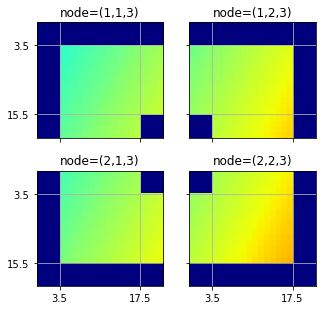

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[5, 5])

k = 2

for i, j in np.ndindex(2, 2):
    axes[i][j].imshow(dat["result"][i,j,k,:,:,4,0], cmap="jet", clim=[0, 250])
    axes[i][j].set_title("node=(%d,%d,%d)" % (i+1, j+1, k+1))
    axes[i][j].set_xticks([4-0.5, 14+4-0.5])
    axes[i][j].set_yticks([4-0.5, 12+4-0.5])
    axes[i][j].grid()

In [30]:
dat = np.loadtxt("./test004_result.txt")

(0, 30)

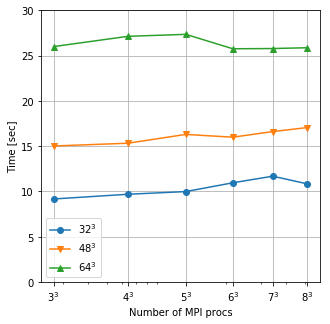

In [32]:
plt.figure(figsize=[5,5])
plt.plot(dat[1:,0]**3, dat[1:,2+0], "-o", label="$32^3$")
plt.plot(dat[1:,0]**3, dat[1:,2+3], "-v", label="$48^3$")
plt.plot(dat[1:,0]**3, dat[1:,2+6], "-^", label="$64^3$")
plt.xscale("log")

plt.xticks([i**3 for i in range(3, 9)], ["$%d^3$" % i for i in range(3, 9)])
plt.xlabel("Number of MPI procs")
plt.ylabel("Time [sec]")
plt.legend()
plt.grid()
plt.ylim([0, 30])